In [1]:
import os
import pydicom
import pydicom_seg
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dir_project = ""
dir_orig = dir_project + "Colorectal-Liver-Metastases/"
dir_dest = dir_project + "data/"

In [9]:
list_pct  = list(sorted(os.listdir(dir_orig)))
len(list_pct)

197

# Dataset 5 clases (BG-LV-HV-PV-TM)

In [11]:
for name_pct in list_pct:
    print(name_pct)
    temp0 = list(os.listdir(dir_orig + name_pct))
    temp1 = list(sorted(os.listdir(dir_orig + name_pct + '/' + temp0[0])))
    if temp1[0].find("Segmentation") != -1:
        path_seg = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[0]
        path_img = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[1]
    else: 
        path_seg = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[1]
        path_img = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[0]
        
    # mask:
    msk_dcm = pydicom.read_file(path_seg + '/' + '1-1.dcm')
    reader = pydicom_seg.SegmentReader()
    result = reader.read(msk_dcm) # (N,512,12) ('Liver','Liver Remnant',Hepatic','Portal','Tumor_x')
    M = len(msk_dcm[0x00081115][0][0x0008114a].value)
    N = len(result.available_segments)
    strings = []
    for i in range(0,M):
        strings.append(msk_dcm[0x00081115][0][0x0008114a][i][0x00081155].value)
    
    # image:
    list_imgs  = list(sorted(os.listdir(path_img)))
    for name in list_imgs:
        image = pydicom.read_file(path_img + '/' + name)
        imgss = image.pixel_array #(512, 512) [-1024,3071] dtype('int16')
        img_path = dir_dest + "images/"+ name_pct + '_' + name.replace(".dcm",".npy")
        np.save(img_path, imgss.astype(np.int16)) # (512,512)
        # Generar mask
        mskss = np.zeros((512,512),dtype=np.uint8)
        if image[0x00080018].value in strings:
            indice = strings.index(image[0x00080018].value)
            Temp0 = mskss
            for i in range(5,N+1):
                Temp0 = Temp0 + 4*result.segment_data(i)[indice,:,:] # Tumor
            mskss = mskss + (4*(Temp0>=4)).astype(np.uint8)  # (0,4)   
            Temp1 = mskss + 2*result.segment_data(3)[indice,:,:]  # Hepatic --0.2.4.6
            Temp2 = (2*(Temp1==2)).astype(np.uint8)
            mskss = mskss + Temp2 # (0,2,4)
            Temp1 = mskss + 3*result.segment_data(4)[indice,:,:]  # Portal --0.2.3.5.7 
            Temp2 = (3*(Temp1==3)).astype(np.uint8)
            mskss = mskss + Temp2 # (0,2,3,4)
            Temp1 = mskss + result.segment_data(1)[indice,:,:]   # Lives
            Temp2 = (1*(Temp1==1)).astype(np.uint8)
            mskss = mskss + Temp2 # (0,1,2,3,4)
    
        # 0-1-2-3-4   (BG-Li(1)-HV(3)-PV(4)-T(5-X))
        msk_path = dir_dest + "masks/"+ name_pct + '_' + name.replace(".dcm",".npy")
        np.save(msk_path, mskss.astype(np.uint8)) # (512,512)

CRLM-CT-1001
CRLM-CT-1002
CRLM-CT-1003
CRLM-CT-1004
CRLM-CT-1005
CRLM-CT-1006
CRLM-CT-1007
CRLM-CT-1008
CRLM-CT-1009
CRLM-CT-1010
CRLM-CT-1011
CRLM-CT-1012
CRLM-CT-1013
CRLM-CT-1014
CRLM-CT-1015
CRLM-CT-1016
CRLM-CT-1017
CRLM-CT-1018
CRLM-CT-1019
CRLM-CT-1020
CRLM-CT-1021
CRLM-CT-1022
CRLM-CT-1023
CRLM-CT-1025
CRLM-CT-1026
CRLM-CT-1027
CRLM-CT-1028
CRLM-CT-1029
CRLM-CT-1030
CRLM-CT-1031
CRLM-CT-1032
CRLM-CT-1033
CRLM-CT-1034
CRLM-CT-1035
CRLM-CT-1036
CRLM-CT-1037
CRLM-CT-1038
CRLM-CT-1039
CRLM-CT-1040
CRLM-CT-1041
CRLM-CT-1042
CRLM-CT-1043
CRLM-CT-1044
CRLM-CT-1045
CRLM-CT-1046
CRLM-CT-1047
CRLM-CT-1048
CRLM-CT-1049
CRLM-CT-1050
CRLM-CT-1051
CRLM-CT-1052
CRLM-CT-1053
CRLM-CT-1054
CRLM-CT-1055
CRLM-CT-1056
CRLM-CT-1057
CRLM-CT-1058
CRLM-CT-1059
CRLM-CT-1060
CRLM-CT-1061
CRLM-CT-1062
CRLM-CT-1063
CRLM-CT-1064
CRLM-CT-1065
CRLM-CT-1066
CRLM-CT-1067
CRLM-CT-1068
CRLM-CT-1069
CRLM-CT-1070
CRLM-CT-1071
CRLM-CT-1072
CRLM-CT-1073
CRLM-CT-1074
CRLM-CT-1075
CRLM-CT-1076
CRLM-CT-1077
CRLM-CT-1078

In [13]:
len(list(sorted(os.listdir("data/images"))))

17639

In [73]:
len(list(sorted(os.listdir("/data/mchicchon/DL/Liver_colorectal/data/masks"))))

17639

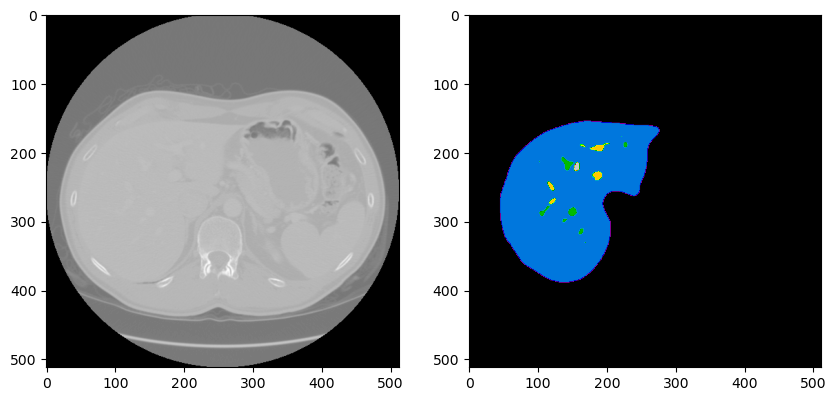

In [14]:
dir_project = "data/"
image = np.load(dir_project+"images/CRLM-CT-1001_1-056.npy")
label = np.load(dir_project+"masks/CRLM-CT-1001_1-056.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(3-verde)-PV(4-amarillo)-T(5-Blanco))
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(label,vmin=0,vmax=4,cmap="nipy_spectral")

In [15]:
np.unique(label)

array([0, 1, 2, 3, 4], dtype=uint8)

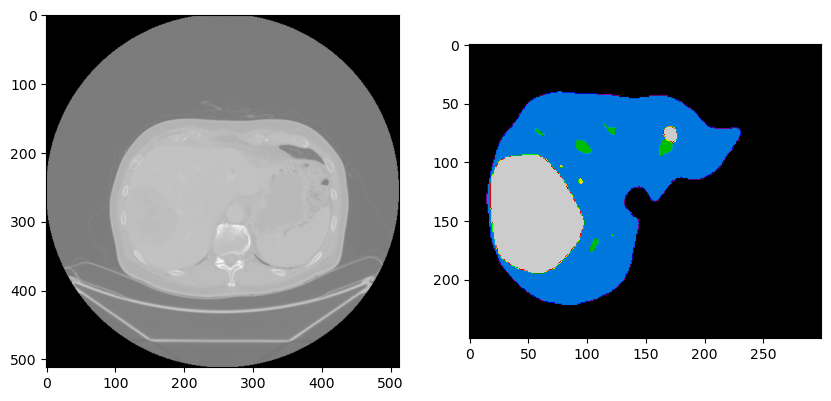

In [17]:
dir_project = "data/"
image = np.load(dir_project+"images/CRLM-CT-1049_1-049.npy")
label = np.load(dir_project+"masks/CRLM-CT-1049_1-049.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(2-verde)-PV(3-amarillo)-T(4-Blanco))
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(label[150:400,100:400],vmin=0,vmax=4,cmap="nipy_spectral")

# Dataset Vessels

In [18]:
dir_project = ""
dir_orig = dir_project + "Colorectal-Liver-Metastases/" # Archivos dicom
dir_dest = dir_project + "data_vessel/"                 # Dataset destino (/masks_lv y /masks_vss) 

In [19]:
for name_pct in list_pct:
    print(name_pct)
    temp0 = list(os.listdir(dir_orig + name_pct))
    temp1 = list(sorted(os.listdir(dir_orig + name_pct + '/' + temp0[0])))
    if temp1[0].find("Segmentation") != -1:
        path_seg = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[0]
        path_img = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[1]
    else: 
        path_seg = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[1]
        path_img = dir_orig + name_pct + '/' + temp0[0] + '/' + temp1[0]
        
    # mask:
    msk_dcm = pydicom.read_file(path_seg + '/' + '1-1.dcm')
    reader = pydicom_seg.SegmentReader()
    result = reader.read(msk_dcm) # (N,512,12) ('Liver','Liver Remnant',Hepatic','Portal','Tumor_x')
    M = len(msk_dcm[0x00081115][0][0x0008114a].value)
    N = len(result.available_segments)
    strings = []
    for i in range(0,M):
        strings.append(msk_dcm[0x00081115][0][0x0008114a][i][0x00081155].value)
    
    # image:
    list_imgs  = list(sorted(os.listdir(path_img)))
    for name in list_imgs:
        image = pydicom.read_file(path_img + '/' + name)
        imgss = image.pixel_array #(512, 512) [-1024,3071] dtype('int16')
        img_path = dir_dest + "images/"+ name_pct + '_' + name.replace(".dcm",".npy")
        #np.save(img_path, imgss.astype(np.int16)) # (512,512)
        # Generar mask
        mskss_vss = np.zeros((512,512),dtype=np.uint8)
        mskss_lv = np.zeros((512,512),dtype=np.uint8)
        if image[0x00080018].value in strings:
            indice = strings.index(image[0x00080018].value)
            #Temp0 = mskss
            #for i in range(5,N+1):
            #    Temp0 = Temp0 + 4*result.segment_data(i)[indice,:,:] # Tumor
            #mskss = mskss + (4*(Temp0>=4)).astype(np.uint8)  # (0,4)   
            Temp1 = 1*result.segment_data(3)[indice,:,:]  # Hepatic --0.1
            #Temp2 = (2*(Temp1==2)).astype(np.uint8)
            mskss_vss = mskss_vss + Temp1 # (0,1)
            Temp1 = mskss_vss + 2*result.segment_data(4)[indice,:,:]  # Portal --0.1.2.3 
            Temp2 = (2*(Temp1==2)).astype(np.uint8)
            mskss_vss = mskss_vss + Temp2 # (0,1,2)
            Temp1 = result.segment_data(1)[indice,:,:]   # Lives
            Temp2 = (1*(Temp1==1)).astype(np.uint8)
            mskss_vss = mskss_vss*Temp2 # (0,1,2)
            mskss_lv = mskss_lv + Temp2 # (0,1) 
    
        # 0-1-2   (HV(1)-PV(2))
        msk_path_vss = dir_dest + "masks_vss/"+ name_pct + '_' + name.replace(".dcm",".npy")
        np.save(msk_path_vss, mskss_vss.astype(np.uint8)) # (512,512)
        msk_path_lv = dir_dest + "masks_lv/"+ name_pct + '_' + name.replace(".dcm",".npy")
        np.save(msk_path_lv, mskss_lv.astype(np.uint8)) # (512,512)

CRLM-CT-1001
CRLM-CT-1002
CRLM-CT-1003
CRLM-CT-1004
CRLM-CT-1005
CRLM-CT-1006
CRLM-CT-1007
CRLM-CT-1008
CRLM-CT-1009
CRLM-CT-1010
CRLM-CT-1011
CRLM-CT-1012
CRLM-CT-1013
CRLM-CT-1014
CRLM-CT-1015
CRLM-CT-1016
CRLM-CT-1017
CRLM-CT-1018
CRLM-CT-1019
CRLM-CT-1020
CRLM-CT-1021
CRLM-CT-1022
CRLM-CT-1023
CRLM-CT-1025
CRLM-CT-1026
CRLM-CT-1027
CRLM-CT-1028
CRLM-CT-1029
CRLM-CT-1030
CRLM-CT-1031
CRLM-CT-1032
CRLM-CT-1033
CRLM-CT-1034
CRLM-CT-1035
CRLM-CT-1036
CRLM-CT-1037
CRLM-CT-1038
CRLM-CT-1039
CRLM-CT-1040
CRLM-CT-1041
CRLM-CT-1042
CRLM-CT-1043
CRLM-CT-1044
CRLM-CT-1045
CRLM-CT-1046
CRLM-CT-1047
CRLM-CT-1048
CRLM-CT-1049
CRLM-CT-1050
CRLM-CT-1051
CRLM-CT-1052
CRLM-CT-1053
CRLM-CT-1054
CRLM-CT-1055
CRLM-CT-1056
CRLM-CT-1057
CRLM-CT-1058
CRLM-CT-1059
CRLM-CT-1060
CRLM-CT-1061
CRLM-CT-1062
CRLM-CT-1063
CRLM-CT-1064
CRLM-CT-1065
CRLM-CT-1066
CRLM-CT-1067
CRLM-CT-1068
CRLM-CT-1069
CRLM-CT-1070
CRLM-CT-1071
CRLM-CT-1072
CRLM-CT-1073
CRLM-CT-1074
CRLM-CT-1075
CRLM-CT-1076
CRLM-CT-1077
CRLM-CT-1078

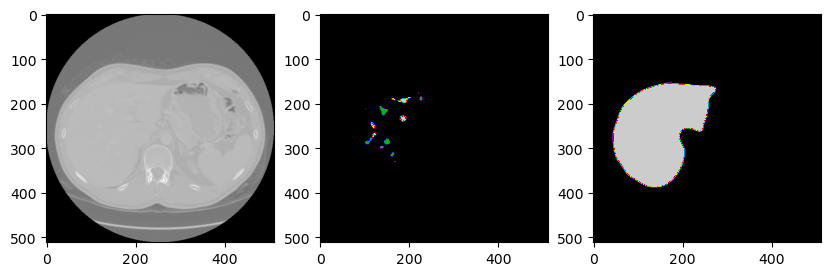

In [20]:
dir_project = ""
image = np.load(dir_project+"data/images/CRLM-CT-1001_1-056.npy")
label_vss = np.load(dir_project+"data_vessel/masks_vss/CRLM-CT-1001_1-056.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(3-verde)-PV(4-amarillo)-T(5-Blanco))
label_lv = np.load(dir_project+"data_vessel/masks_lv/CRLM-CT-1001_1-056.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(3-verde)-PV(4-amarillo)-T(5-Blanco))
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1) 
plt.imshow(image,cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(label_vss,vmin=0,vmax=2,cmap="nipy_spectral")
plt.subplot(1, 3, 3)
plt.imshow(label_lv,vmin=0,vmax=1,cmap="nipy_spectral")

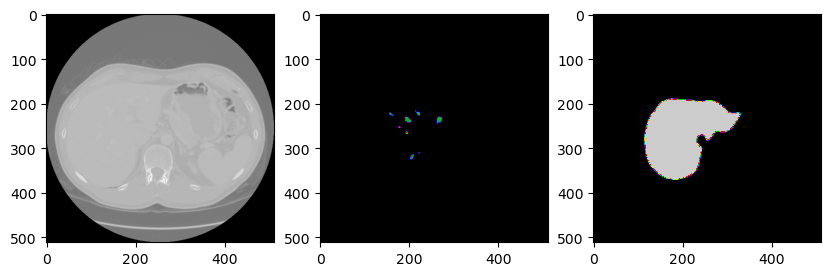

In [21]:
dir_project = ""
image = np.load(dir_project+"data/images/CRLM-CT-1001_1-056.npy")
label_vss = np.load(dir_project+"data_vessel/masks_vss/CRLM-CT-1049_1-049.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(3-verde)-PV(4-amarillo)-T(5-Blanco))
label_lv = np.load(dir_project+"data_vessel/masks_lv/CRLM-CT-1049_1-049.npy") # 0-1-2-3-4 (BG(0-black)-Li(1-celeste)-HV(3-verde)-PV(4-amarillo)-T(5-Blanco))
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1) 
plt.imshow(image,cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(label_vss,vmin=0,vmax=2,cmap="nipy_spectral")
plt.subplot(1, 3, 3)
plt.imshow(label_lv,vmin=0,vmax=1,cmap="nipy_spectral")